In [442]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
import warnings;
warnings.filterwarnings('ignore');

In [443]:
#read training data
train_data = pd.read_csv('/content/drive/MyDrive/Workation price prediction challenge/Train.csv')

#read testing data
test_data = pd.read_csv('/content/drive/MyDrive/Workation price prediction challenge/Test.csv')

In [444]:
train_data.shape


(21000, 15)

In [445]:
train_data.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

In [446]:
train_data.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [447]:
#checking for null value
train_data.isnull().sum()


Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

In [448]:
#check unique value of each columns

for col in train_data.columns:
    print(f' Total Unique Values are {len(train_data[col].unique())} in {col}')

 Total Unique Values are 21000 in Uniq Id
 Total Unique Values are 2204 in Package Name
 Total Unique Values are 5 in Package Type
 Total Unique Values are 565 in Destination
 Total Unique Values are 966 in Itinerary
 Total Unique Values are 565 in Places Covered
 Total Unique Values are 495 in Travel Date
 Total Unique Values are 6060 in Hotel Details
 Total Unique Values are 2 in Start City
 Total Unique Values are 314 in Airline
 Total Unique Values are 3 in Flight Stops
 Total Unique Values are 4 in Meals
 Total Unique Values are 1714 in Sightseeing Places Covered
 Total Unique Values are 10 in Cancellation Rules
 Total Unique Values are 17138 in Per Person Price


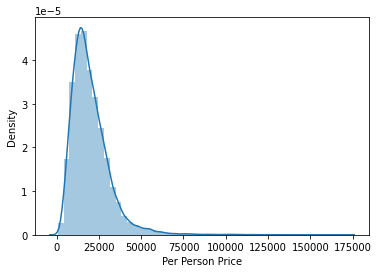

In [449]:
sns.distplot(train_data['Per Person Price'])
plt.show()

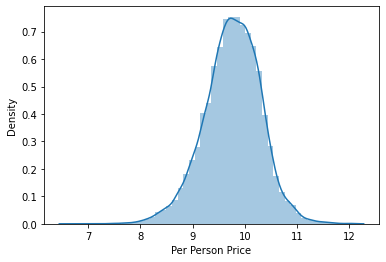

In [450]:
# Log transformed dependent variable
sns.distplot(np.log1p(train_data['Per Person Price']))
plt.show()

In [451]:
train_data.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

Data Preprocessing and Feature Engineering

In [452]:
# 'Places Covered' was similar to 'Destination' hence removed and 'Uniq Id'  was completely unique for all rows therefore did not make sense to be used
train_data.drop(['Places Covered', 'Uniq Id'], axis=1, inplace=True)
 
test_data.drop(['Places Covered', 'Uniq Id'], axis=1, inplace=True)

In [453]:
train_data['Total Destinations Covered']=train_data['Destination'].apply(lambda x : len(x.split('|')))

In [454]:
test_data['Total Destinations Covered']=test_data['Destination'].apply(lambda x : len(x.split('|')))

In [455]:
# Feature containing total no. of sightseeing places covered in a trip
train_data['Total Sightseeing Places Covered'] = train_data['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')) if x != 'Not Available' else -1)

test_data['Total Sightseeing Places Covered'] = test_data['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')) if x != 'Not Available' else -1)

In [456]:
# Feature having total no. of days in respective trips
train_data['Total days'] = train_data['Itinerary'].apply(lambda x: sum(int(j) for j in (re.findall(r'[0-9]', x))))

test_data['Total days'] = test_data['Itinerary'].apply(lambda x: sum(int(i) for i in (re.findall(r'[0-9]', x))))

In [457]:
# Replacing some ratings in word form to respective number in 'Hotel Details'
train_data['Hotel Details'] = train_data['Hotel Details'].apply(lambda x:  x.replace('Four', '4'))
train_data['Hotel Details'] = train_data['Hotel Details'].apply(lambda x:  x.replace('One', '1'))
train_data['Hotel Details'] = train_data['Hotel Details'].apply(lambda x:  x.replace('Two', '2'))
train_data['Hotel Details'] = train_data['Hotel Details'].apply(lambda x:  x.replace('Three', '3'))
train_data['Hotel Details'] = train_data['Hotel Details'].apply(lambda x:  x.replace('Five', '5'))

test_data['Hotel Details'] = test_data['Hotel Details'].apply(lambda x:  x.replace('Four', '4'))
test_data['Hotel Details'] = test_data['Hotel Details'].apply(lambda x:  x.replace('One', '1'))
test_data['Hotel Details'] = test_data['Hotel Details'].apply(lambda x:  x.replace('Two', '2'))
test_data['Hotel Details'] = test_data['Hotel Details'].apply(lambda x:  x.replace('Three', '3'))
test_data['Hotel Details'] = test_data['Hotel Details'].apply(lambda x:  x.replace('Five', '5'))


In [458]:
# Using Regular Expression to obtain Average Rating of Hotels for each trip
train_data['Avg Rating'] = train_data['Hotel Details'].apply(lambda x: sum(float(i.replace(':', '')) for i in (re.findall(r'[:][0-9]*[.]?[0-9]+', x))) / len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) if len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) != 0 else -1)

test_data['Avg Rating'] = test_data['Hotel Details'].apply(lambda x: sum(float(i.replace(':', '')) for i in (re.findall(r'[:][0-9]*[.]?[0-9]+', x))) / len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) if len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) != 0 else -1)

In [459]:
# Dropping date features improved score
train_data.drop('Travel Date', axis=1, inplace=True)
test_data.drop('Travel Date', axis=1, inplace=True)

In [460]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()


# Encoding function for few catgeorical features
def ordinal_enc(df, col, testing=False):
    if testing == False:
        df[col] = oe.fit_transform(df[col])
        
    else:
        df[col] = oe.transform(df[col])
    return df

In [461]:
cat_feature = ['Start City', 'Package Type', 'Cancellation Rules', 'Destination']

# Ordinal Encoding 'cat_feature' columns 
train_data = ordinal_enc(train_data, cat_feature)
test_data = ordinal_enc(test_data, cat_feature)

In [462]:
# Ratio feature of 'Total Sightseeing Places Covered' and 'Total days'
train_data['Sightseeing per days'] = train_data['Total Sightseeing Places Covered'] / (train_data['Total days']) 

# Ratio feature of 'Total Destinations Covered' and 'Total days'
train_data['total destination per days'] = train_data['Total Destinations Covered'] / (train_data['Total days'])


test_data['Sightseeing per days'] = test_data['Total Sightseeing Places Covered'] / test_data['Total days']
test_data['total destination per days'] = test_data['Total Destinations Covered'] / test_data['Total days']

In [463]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting features from text columns using CountVectorizer
def CountVect(column, train, test):
    vect = CountVectorizer()
    
    train_feature = vect.fit_transform(train[column])
    train_feature = pd.DataFrame(train_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    train = pd.concat([train, train_feature], axis=1)
    
    test_feature = vect.transform(test[column])
    test_feature = pd.DataFrame(test_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    test = pd.concat([test, test_feature], axis=1)
    
    return train, test

In [464]:
# Calling 'CountVec' function for these columns
for column in ['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline']:
    train_data, test_data = CountVect(column, train_data, test_data)

In [465]:
# Dropping columns after text feature extraction
train_data.drop(['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary','Airline'], axis=1, inplace=True)

test_data.drop(['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary','Airline'], axis=1, inplace=True)

In [466]:
test_data.head()

,Package Type,Destination,Start City,Flight Stops,Meals,Cancellation Rules,Total Destinations Covered,Total Sightseeing Places Covered,Total days,Avg Rating,Sightseeing per days,total destination per days,Sightseeing Places Covered0,Sightseeing Places Covered1,Sightseeing Places Covered2,Sightseeing Places Covered3,Sightseeing Places Covered4,Sightseeing Places Covered5,Sightseeing Places Covered6,Sightseeing Places Covered7,Sightseeing Places Covered8,Sightseeing Places Covered9,Sightseeing Places Covered10,Sightseeing Places Covered11,Sightseeing Places Covered12,Sightseeing Places Covered13,Sightseeing Places Covered14,Sightseeing Places Covered15,Sightseeing Places Covered16,Sightseeing Places Covered17,Sightseeing Places Covered18,Sightseeing Places Covered19,Sightseeing Places Covered20,Sightseeing Places Covered21,Sightseeing Places Covered22,Sightseeing Places Covered23,Sightseeing Places Covered24,Sightseeing Places Covered25,Sightseeing Places Covered26,Sightseeing Places Covered27,...,Airline23,Airline24,Airline25,Airline26,Airline27,Airline28,Airline29,Airline30,Airline31,Airline32,Airline33,Airline34,Airline35,Airline36,Airline37,Airline38,Airline39,Airline40,Airline41,Airline42,Airline43,Airline44,Airline45,Airline46,Airline47,Airline48,Airline49,Airline50,Airline51,Airline52,Airline53,Airline54,Airline55,Airline56,Airline57,Airline58,Airline59,Airline60,Airline61,Airline62
0,2.0,177.0,1.0,0,4,0.0,1,-1,5,4.10,-0.200000,0.200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,39.0,1.0,0,4,6.0,1,1,2,4.40,0.500000,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.0,314.0,1.0,2,3,6.0,1,4,3,-1.00,1.333333,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,314.0,0.0,1,3,6.0,1,6,3,-1.00,2.000000,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,87.0,1.0,0,4,0.0,4,10,5,4.55,2.000000,0.800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [467]:
train_data.shape

(21000, 4313)

In [468]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LassoCV, ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from category_encoders import MEstimateEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb

In [469]:

# Separating and storing independent and dependent variable in X and y respectively
X, y = train_data.drop('Per Person Price', axis=1), train_data['Per Person Price']

In [470]:
# Stacking regressor function to ensemble LGBM and CatBoost
def get_stacking():
    level0 = [('lgbm_regressor', lgb.LGBMRegressor(n_estimators=3000, max_depth=11, learning_rate=0.06, num_leaves=40)),
               #('XGB_regressor', xgb.XGBRegressor(n_estimators=700, objective='reg:squarederror', max_depth=7, learning_rate=0.06, colsample_bytree=0.9, subsample=0.8)),
               ('catboost', CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=2000, depth=6))]
    
    level1 = LinearRegression()
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

LGBM performance

In [472]:
# K-Fold Cross Validation 
kf = KFold(n_splits=10, shuffle=True)
scores = []
for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train = X.iloc[train_index]
    X_train = ordinal_enc(X_train, cat_feature)
    
    y_train = np.log1p(y.iloc[train_index])
    
    X_test = X.iloc[test_index]
    X_test = ordinal_enc(X_test, cat_feature)

    y_test = y.iloc[test_index]
    
    #model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03)
    #model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    #model = ElasticNet()
    model = lgb.LGBMRegressor(n_estimators=2500, max_depth=11, learning_rate=0.05, num_leaves=40)
    #model = xgb.XGBRegressor(n_estimators=590, objective='reg:squarederror', max_depth=7, learning_rate=0.06, min_child_weight=1.2)
    #model = get_stacking()
    #model = ExtraTreesRegressor(n_estimators=500, bootstrap=True, n_jobs=-1)
    #model = LinearRegression()
    #model = KNeighborsRegressor(weights='distance', n_neighbors=15)
    #model = CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=1700, depth=6)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
 
    score = np.sqrt(mean_squared_log_error(y_test, np.expm1((pred))))
    print(f'RMSLE score for fold {fold} is {score}')
    scores.append(score)

print(f'Mean RMSLE score is {np.mean(scores)}')

RMSLE score for fold 1 is 0.1619178432001924
RMSLE score for fold 2 is 0.16499806529430805
RMSLE score for fold 3 is 0.15806629382688506
RMSLE score for fold 4 is 0.1684630853792599
RMSLE score for fold 5 is 0.1623543776684303
RMSLE score for fold 6 is 0.15595732055854303
RMSLE score for fold 7 is 0.16864134376447143
RMSLE score for fold 8 is 0.15806910349217085
RMSLE score for fold 9 is 0.1599020138518649
RMSLE score for fold 10 is 0.16093855973523066
Mean RMSLE score is 0.16193080067713567


Model Training and prediction